<a href="https://colab.research.google.com/github/nayanpunmiya/Optimized-AI-ML-Models-for-Personalized-Travel-Itineraries/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 First 5 Rows:
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.

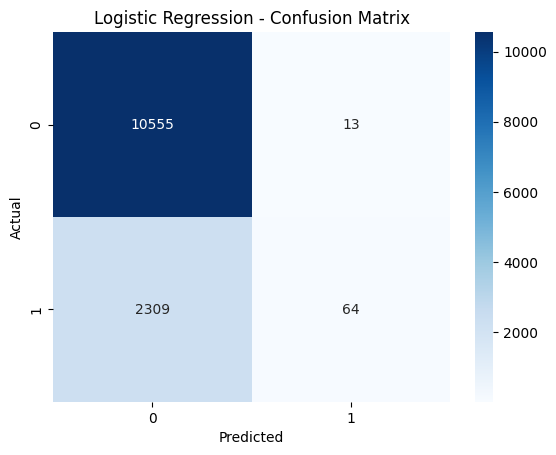


🔍 Random Forest
🔹 Accuracy:  0.8563
🔹 Precision: 0.6616
🔹 Recall:    0.4425
🔹 F1 Score:  0.5303

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     10568
           1       0.66      0.44      0.53      2373

    accuracy                           0.86     12941
   macro avg       0.77      0.70      0.72     12941
weighted avg       0.84      0.86      0.84     12941



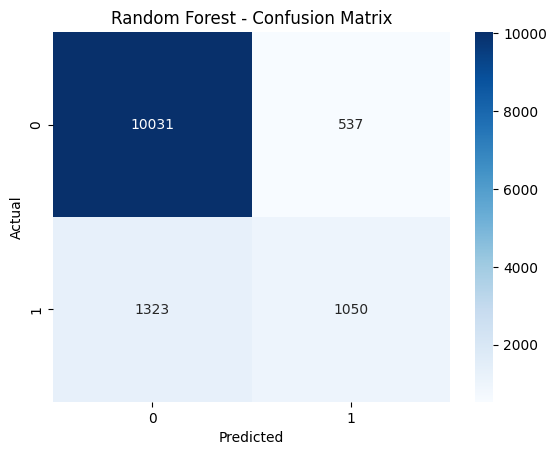


🔍 Gradient Boosting
🔹 Accuracy:  0.8421
🔹 Precision: 0.8007
🔹 Recall:    0.1846
🔹 F1 Score:  0.3000

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     10568
           1       0.80      0.18      0.30      2373

    accuracy                           0.84     12941
   macro avg       0.82      0.59      0.61     12941
weighted avg       0.84      0.84      0.80     12941



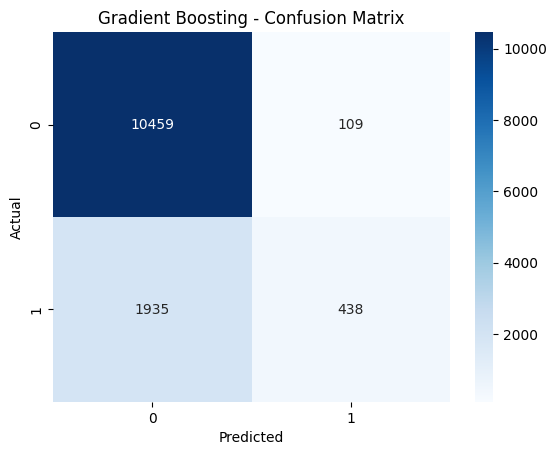


🔍 Voting Classifier (Ensemble)
🔹 Accuracy:  0.8422
🔹 Precision: 0.8264
🔹 Recall:    0.1766
🔹 F1 Score:  0.2910

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     10568
           1       0.83      0.18      0.29      2373

    accuracy                           0.84     12941
   macro avg       0.83      0.58      0.60     12941
weighted avg       0.84      0.84      0.80     12941



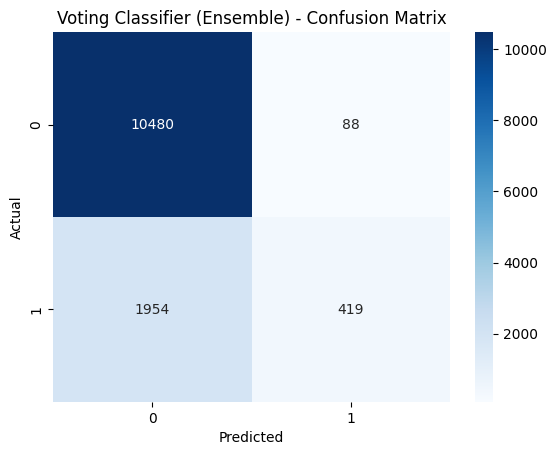


📊 Model Comparison Table:

                              Accuracy  Precision  Recall  F1 Score
Logistic Regression             0.8206     0.8312  0.0270    0.0522
Random Forest                   0.8563     0.6616  0.4425    0.5303
Gradient Boosting               0.8421     0.8007  0.1846    0.3000
Voting Classifier (Ensemble)    0.8422     0.8264  0.1766    0.2910
📁 Exported: Model_Performance_Comparison.csv
📁 Exported: Model_Performance_Table.tex (for LaTeX or Word use)


<Figure size 1200x600 with 0 Axes>

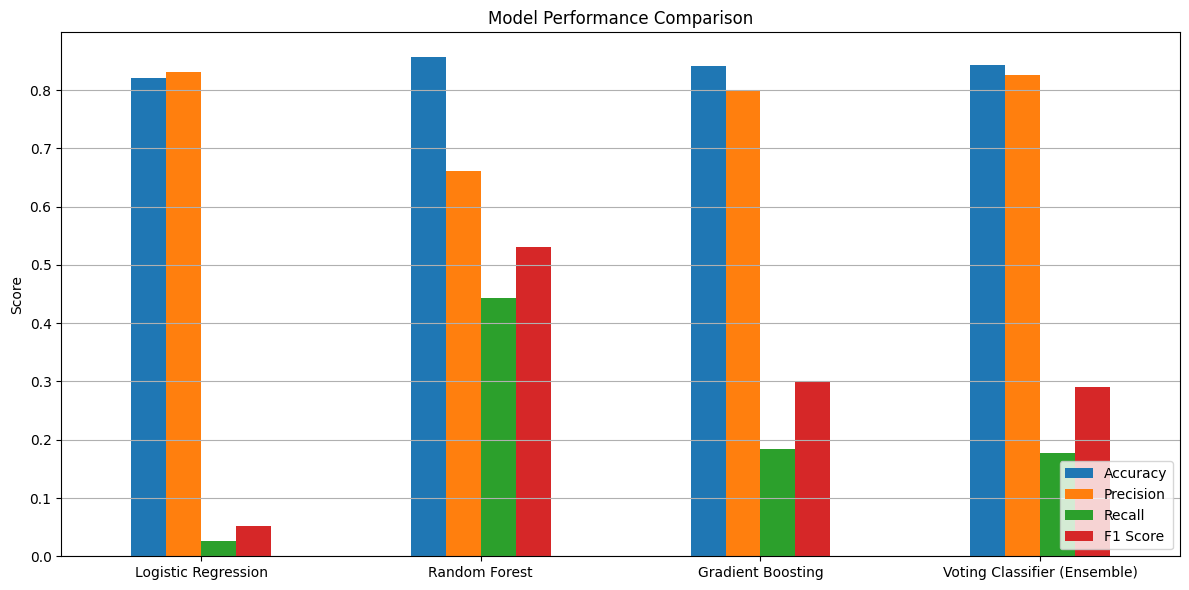

📁 Exported: Model_Performance_Chart.png (bar chart)


In [ ]:
# ✅ STEP 1: Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ✅ STEP 1: Load and Explore Dataset
df = pd.read_csv(r"/content/GlobalWeatherRepository.csv")

print("🔹 First 5 Rows:")
print(df.head())

print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Column Names:")
print(df.columns.tolist())

# ✅ STEP 2: Define Target Variable
possible_weather_cols = [col for col in df.columns if 'weather' in col.lower() or 'condition' in col.lower() or 'event' in col.lower()]
if not possible_weather_cols:
    raise Exception("❌ No weather-related column found.")
else:
    weather_col = possible_weather_cols[0]
    print(f"\n✅ Detected weather column: '{weather_col}'")

bad_weather_keywords = ['Rain', 'Snow', 'Storm', 'Fog', 'Thunderstorm', 'Hail', 'Sleet', 'Drizzle']
df[weather_col] = df[weather_col].astype(str)
df['adjust_required'] = df[weather_col].apply(lambda x: 1 if any(bad.lower() in x.lower() for bad in bad_weather_keywords) else 0)

print("\n🔹 Target Label Distribution:")
print(df['adjust_required'].value_counts())

# ✅ STEP 3: Preprocessing
df = df.dropna()

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in df.select_dtypes(include=['object']).columns if col != weather_col]

selected_features = []
if 'temperature' in df.columns:
    selected_features.append('temperature')
if 'humidity' in df.columns:
    selected_features.append('humidity')
if 'wind_speed' in df.columns:
    selected_features.append('wind_speed')
if categorical_features:
    selected_features += categorical_features[:2]

print(f"\n✅ Selected Features: {selected_features}")

# Encode and scale
le = LabelEncoder()
for col in selected_features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

X = df[selected_features]
y = df['adjust_required']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✅ X_train shape: {X_train.shape}")

# ✅ STEP 4: Train Models
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
voting_clf = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

# Fit all models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# ✅ STEP 5: Evaluate Models
metrics = {}

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

    print(f"\n🔍 {name}")
    print(f"🔹 Accuracy:  {acc:.4f}")
    print(f"🔹 Precision: {prec:.4f}")
    print(f"🔹 Recall:    {rec:.4f}")
    print(f"🔹 F1 Score:  {f1:.4f}")
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all models
evaluate_model(lr, "Logistic Regression")
evaluate_model(rf, "Random Forest")
evaluate_model(gb, "Gradient Boosting")
evaluate_model(voting_clf, "Voting Classifier (Ensemble)")

# ✅ STEP 6: Compare Models & Export

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics).T.round(4)
print("\n📊 Model Comparison Table:\n")
print(metrics_df)

# Export to CSV
metrics_df.to_csv("Model_Performance_Comparison.csv")
print("📁 Exported: Model_Performance_Comparison.csv")

# LaTeX/Word Table Export
latex_table = metrics_df.to_latex(index=True, caption='Model Performance Comparison', label='tab:model_perf')
with open("Model_Performance_Table.tex", "w") as f:
    f.write(latex_table)
print("📁 Exported: Model_Performance_Table.tex (for LaTeX or Word use)")

# Bar Chart Plot
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("Model_Performance_Chart.png")
plt.show()

print("📁 Exported: Model_Performance_Chart.png (bar chart)")


✅ After SMOTE - Class Distribution:
adjust_required
0    51294
1    51294
Name: count, dtype: int64

🔍 Final Optimized Random Forest Metrics:
🔹 Accuracy:  0.9815
🔹 Precision: 0.2887
🔹 Recall:    0.7179
🔹 F1 Score:  0.4118

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12824
           1       0.29      0.72      0.41       117

    accuracy                           0.98     12941
   macro avg       0.64      0.85      0.70     12941
weighted avg       0.99      0.98      0.99     12941



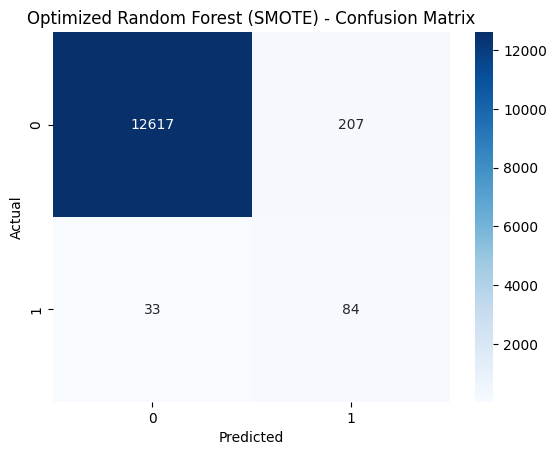

📁 Exported: Optimized_RF_Metrics.csv
📁 Exported: Optimized_RF_Metrics.tex


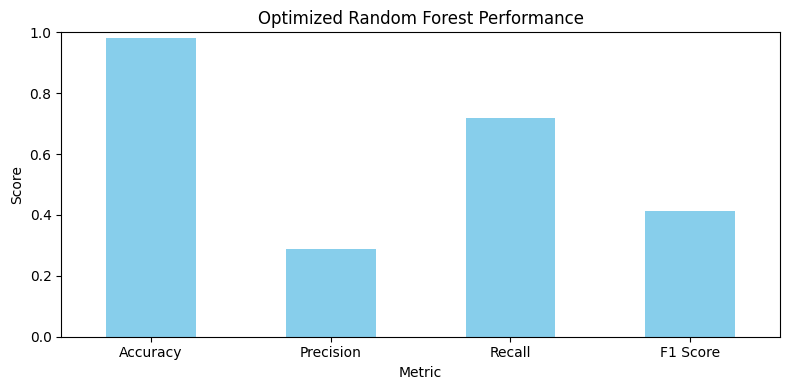

📁 Exported: Optimized_RF_Performance.png


In [ ]:
# ✅ STEP 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# ✅ STEP 2: Load & Explore Dataset
df = pd.read_csv(r"/content/GlobalWeatherRepository.csv")

# Detect weather-related column
weather_col = [col for col in df.columns if 'weather' in col.lower() or 'condition' in col.lower() or 'event' in col.lower()]
weather_col = weather_col[0] if weather_col else None
if not weather_col:
    raise Exception("No weather-related column found.")

bad_weather_keywords = ['Rain', 'Snow', 'Storm', 'Fog', 'Thunderstorm', 'Hail', 'Sleet', 'Drizzle']
df[weather_col] = df[weather_col].astype(str)
df['adjust_required'] = df[weather_col].apply(lambda x: 1 if any(bad in x for bad in bad_weather_keywords) else 0)

df = df.dropna()

# ✅ STEP 3: Feature Selection & Preprocessing
selected_features = []
if 'temperature' in df.columns: selected_features.append('temperature')
if 'humidity' in df.columns: selected_features.append('humidity')
if 'wind_speed' in df.columns: selected_features.append('wind_speed')
categorical_features = [col for col in df.select_dtypes(include='object').columns if col != weather_col]
selected_features += categorical_features[:2]

# Encode categoricals
le = LabelEncoder()
for col in selected_features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Normalize numericals
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

X = df[selected_features]
y = df['adjust_required']

# ✅ STEP 4: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ STEP 5: Apply SMOTE to Fix Class Imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"✅ After SMOTE - Class Distribution:\n{pd.Series(y_train_res).value_counts()}")

# ✅ STEP 6: Train Optimized Random Forest
best_rf = RandomForestClassifier(
    n_estimators=250,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_res, y_train_res)

# ✅ STEP 7: Evaluate Model
y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n🔍 Final Optimized Random Forest Metrics:")
print(f"🔹 Accuracy:  {acc:.4f}")
print(f"🔹 Precision: {prec:.4f}")
print(f"🔹 Recall:    {rec:.4f}")
print(f"🔹 F1 Score:  {f1:.4f}")
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Optimized Random Forest (SMOTE) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ EXPORTS

# → CSV
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Optimized Random Forest': [acc, prec, rec, f1]
}).set_index('Metric')
metrics_df.to_csv("Optimized_RF_Metrics.csv")
print("📁 Exported: Optimized_RF_Metrics.csv")

# → LaTeX
latex_code = metrics_df.to_latex(index=True, caption='Optimized Random Forest Performance with SMOTE', label='tab:rf_smote')
with open("Optimized_RF_Metrics.tex", "w") as f:
    f.write(latex_code)
print("📁 Exported: Optimized_RF_Metrics.tex")

# → PNG Bar Chart
metrics_df.plot(kind='bar', legend=False, figsize=(8, 4), color='skyblue')
plt.title("Optimized Random Forest Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("Optimized_RF_Performance.png")
plt.show()
print("📁 Exported: Optimized_RF_Performance.png")
